# COM S 474/574 Fall 2024
# 3.2 Logistic Regression
## Bowen Weng (bweng@iastate.edu)

### - The Real Estate Dataset - Mod

- data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/
- a local copy is saved as "data/Real_estate.csv"

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read and print the data set
real_estate_data = pd.read_csv("data/Real_estate.csv")

In [4]:
# modify the data set for the classification purpose
real_estate_data_cls = real_estate_data.copy()
real_estate_data_cls["Y house price of unit area"] = \
real_estate_data_cls["Y house price of unit area"]>real_estate_data_cls["Y house price of unit area"].mean()
print (real_estate_data_cls)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

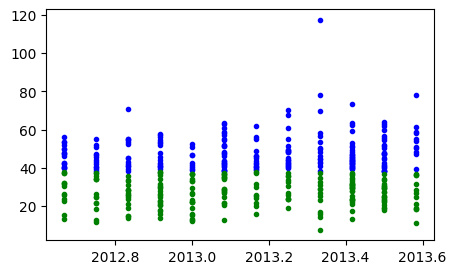

In [5]:
fig, ax = plt.subplots(1, figsize=(5,3))
idx = np.where(real_estate_data_cls["Y house price of unit area"].to_numpy()==True)[0]
neg_idx = np.where(real_estate_data_cls["Y house price of unit area"].to_numpy()==False)[0]
ax.plot(real_estate_data_cls["X1 transaction date"][idx], 
         real_estate_data["Y house price of unit area"][idx], "b.")
ax.plot(real_estate_data_cls["X1 transaction date"][neg_idx], 
         real_estate_data["Y house price of unit area"][neg_idx], "g.")


### A Regression Perspective

In [6]:
from sklearn import linear_model

In [7]:
xs = real_estate_data_cls["X2 house age"].to_numpy()
ys = real_estate_data_cls["Y house price of unit area"].to_numpy().astype(int)
ys = ys * 2 - 1
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(xs.reshape(-1,1), ys)

LinearRegression()

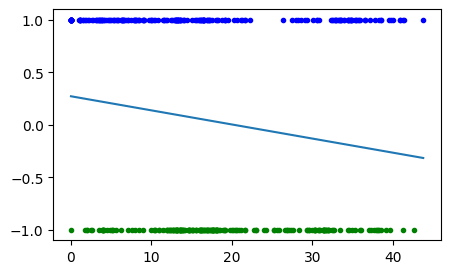

In [8]:
fig, ax = plt.subplots(1, figsize=(5,3))
idx = np.where(real_estate_data_cls["Y house price of unit area"].to_numpy()==True)[0]
neg_idx = np.where(real_estate_data_cls["Y house price of unit area"].to_numpy()==False)[0]
ax.plot(xs[idx], ys[idx], "b.")
ax.plot(xs[neg_idx], ys[neg_idx], "g.")
ax.plot(np.sort(xs), model.predict(np.sort(xs).reshape(-1,1)),"-")

### Logistic Function

In [9]:
def logistic_func(x, w=1, b=0):
    z = w*x + b 
    return 1/(1+np.exp(-z))

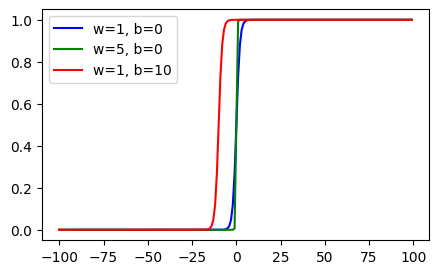

In [10]:
xs = np.arange(-100,100)
fig, ax = plt.subplots(1, figsize=(5,3))
ax.plot(xs, logistic_func(xs),"b-", label="w=1, b=0")
ax.plot(xs, logistic_func(xs, w=5, b=0),"g-", label="w=5, b=0")
ax.plot(xs, logistic_func(xs, w=1, b=10),"r-", label="w=1, b=10")
plt.legend()

### Data set to be used in HW1

In [11]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, 
                           n_features=4, 
                           n_informative=3, 
                           n_redundant=1, 
                           n_classes=3, 
                           random_state=1)

In [12]:
print (y)

[0 2 1 1 0 1 1 0 0 0 0 0 2 0 1 1 1 2 0 1 2 2 0 1 2 0 0 0 2 1 1 0 0 0 0 1 2
 1 2 1 1 1 0 2 1 1 0 2 2 0 0 1 2 0 1 1 0 2 2 0 2 2 2 1 2 2 2 1 2 1 2 1 2 2
 2 1 1 0 0 2 0 1 1 2 2 1 0 2 0 0 2 0 2 0 1 2 1 1 0 0]


In [13]:
print (X)

[[ 1.19902439  0.13177028  0.71842657  0.73491272]
 [ 4.39714643 -4.44518844  0.91042175 -1.3384189 ]
 [ 0.05915045 -2.03114901  0.05153622 -2.04599577]
 [-1.35830703  0.49989717 -1.58947966  0.26903584]
 [ 0.19737164  2.09347321  1.24901942  1.58570711]
 [-1.84487279  0.3379107  -1.93799812 -0.10718848]
 [-1.30468982  1.13099951 -1.65292563  0.99233972]
 [ 0.7774      0.450696   -0.3012693   1.284355  ]
 [-0.78521891  1.82024677  1.47094549  0.35428721]
 [ 2.08962943 -0.54300918  0.08702973  1.15727016]
 [ 0.97914444 -0.59842993 -0.33699956  0.40714385]
 [ 1.13310429  1.47646393  0.35557104  2.25386712]
 [ 1.77576508 -2.62133479 -0.32379397 -0.98780177]
 [ 1.27505434 -0.21468613  1.81333214 -0.17626262]
 [-1.96923251  1.32582903 -1.40473916  0.4899421 ]
 [-0.7514743   1.02186482 -0.97164577  0.9595879 ]
 [-0.32847    -0.8831329  -0.711877   -0.77016698]
 [-0.54104029 -1.66033165 -2.29823199 -0.83764563]
 [ 0.15972951 -0.06692872  0.83533515 -0.40869554]
 [-1.78196613  1.63078037 -0.88

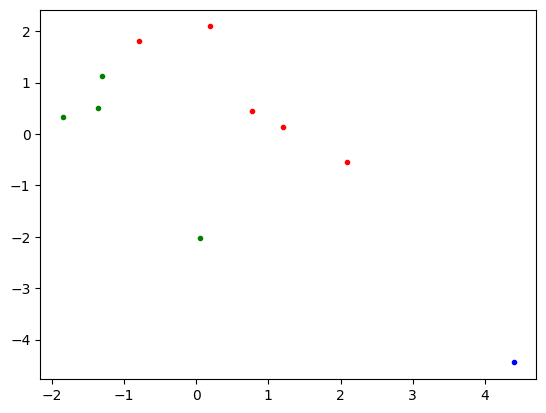

In [14]:
import matplotlib.pyplot as plt
for i in range(10):
    if y[i] == 0:
        plt.plot(X.T[0][i], X.T[1][i],"r.")
    if y[i] == 1:
        plt.plot(X.T[0][i], X.T[1][i],"g.")
    if y[i] == 2:
        plt.plot(X.T[0][i], X.T[1][i],"b.")

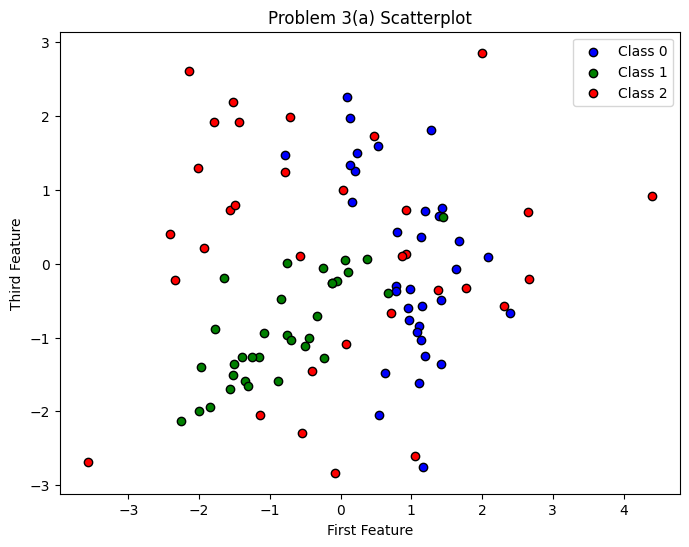

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

colors = ['b', 'g', 'r']
for i, color in enumerate(colors):
    plt.scatter(X[y==i,0],
                X[y==i,2],
                c=color,
                label=f'Class {i}',
                edgecolor='k'
    )

plt.title('Problem 3(a) Scatterplot')
plt.xlabel('First Feature')
plt.ylabel('Third Feature')
plt.legend(loc='best')
plt.show()

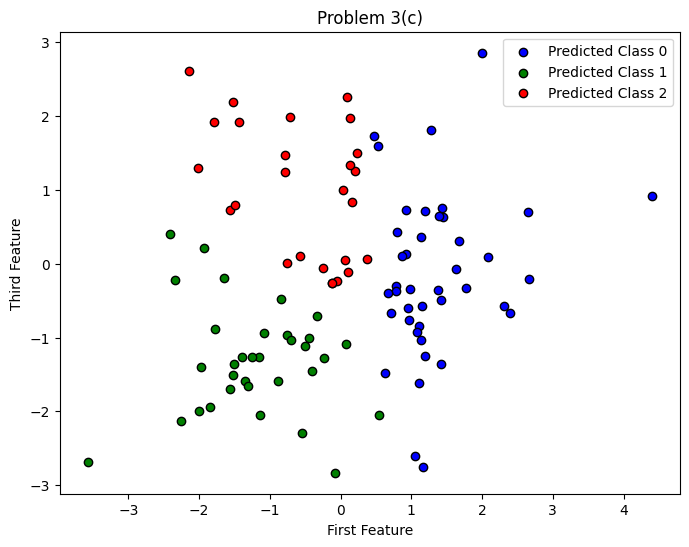

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

# create and fit the model
logisitc_regression = LogisticRegression()
ovo_classifier = OneVsOneClassifier(logisitc_regression)
ovo_classifier.fit(X[:, [0, 2]], y)

# predict the classes
pred = ovo_classifier.predict(X[:, [0, 2]])

# plot the predicted classes
plt.figure(figsize=(8, 6))

for i, color in enumerate(colors):
    plt.scatter(X[pred == i, 0],
    X[pred == i, 2],
    c=color,
    label=f'Predicted Class {i}',
    edgecolor='k')

plt.title('Problem 3(c)')
plt.xlabel('First Feature')
plt.ylabel('Third Feature')
plt.legend(loc='best')

plt.show()

HW2 Section 2 Problem 2

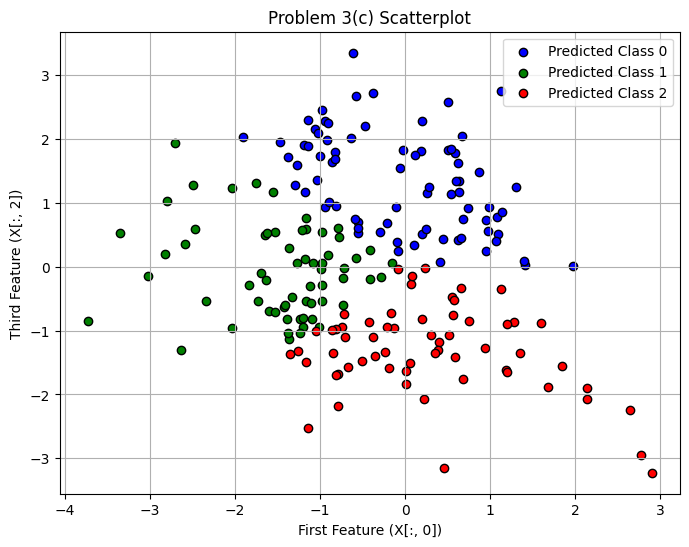

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, # Increased to 200 for better "One-vs-One"
n_features=4,
n_informative=3,
n_redundant=1,
n_classes=3,
random_state=1)
# Initializes a logistic regression model for binary classification
binary_classifier = LogisticRegression()
# Builds a One-vs-One classifier using logistic regression as the base estimator
ovo_classifier = OneVsOneClassifier(binary_classifier)
# Fits the classifier on the dataset
ovo_classifier.fit(X[:, [0, 2]], y)
# Generates predictions
y_pred = ovo_classifier.predict(X[:, [0, 2]])
# Plots the reclassified data
plt.figure(figsize=(8, 6))
# Uses the same colors for predicted classes
for i, color in enumerate(colors):
    plt.scatter(X[y_pred == i, 0],
                X[y_pred == i, 2],c=color,
                label=f'Predicted Class {i}',
                edgecolor='k')
    
plt.title('Problem 3(c) Scatterplot')
plt.xlabel('First Feature (X[:, 0])')
plt.ylabel('Third Feature (X[:, 2])')
plt.legend(loc='best')
plt.grid(True)
plt.show()